100it [00:28,  3.54it/s]
100it [00:27,  3.61it/s]
100it [00:27,  3.61it/s]
100it [00:28,  3.48it/s]
100it [00:28,  3.54it/s]
100it [00:27,  3.57it/s]
100it [00:27,  3.70it/s]
100it [00:28,  3.51it/s]
100it [00:28,  3.50it/s]
100it [00:27,  3.68it/s]
100it [00:26,  3.79it/s]
100it [00:26,  3.74it/s]
100it [00:28,  3.48it/s]
100it [00:27,  3.63it/s]
100it [00:27,  3.58it/s]
100it [00:27,  3.65it/s]
100it [00:27,  3.58it/s]
100it [00:27,  3.58it/s]
100it [00:27,  3.65it/s]
100it [00:27,  3.63it/s]


MultipleStartLS
MultipleStartLS


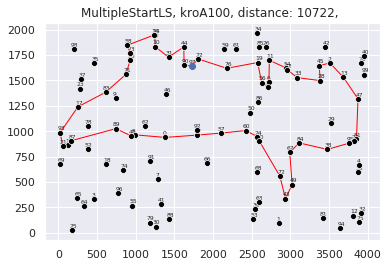

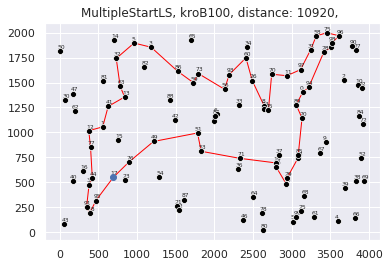

,strategy,instance,cost,time
0,MultipleStartLS,kroA100,10983,28.243042
0,MultipleStartLS,kroA100,11176,27.741750
0,MultipleStartLS,kroA100,10844,27.744119
0,MultipleStartLS,kroA100,11243,28.757336
0,MultipleStartLS,kroA100,10722,28.218664
0,MultipleStartLS,kroA100,11039,28.007016
0,MultipleStartLS,kroA100,11144,27.046314
0,MultipleStartLS,kroA100,11018,28.505617
0,MultipleStartLS,kroA100,11122,28.556975
0,MultipleStartLS,kroA100,11298,27.217727


In [2]:
from collections import defaultdict
from itertools import product
from random import seed

import seaborn as sns
import numpy as np
from tqdm import tqdm

from strategies.greedy_cycle.cheapest_insertion import CheapestInsertion
from api.instance import Instance
from strategies.local_search.local_search import LocalSearch
from strategies.local_search_candidates_moves.local_search_candidates_moves import LocalSearchWitchCandidatesMoves
from strategies.ls_cache.local_search_with_cache import LocalSearchWitchCache
from strategies.multiple_local_search.multiple_local_search import MultipleStartLocalSearch
from utils.utils import draw_solution
import pandas as pd

sns.set()
df = pd.DataFrame(columns=['strategy','instance', 'cost', 'time'])
for instance_name in ['kroA100', 'kroB100']:
    instance = Instance(name=instance_name)
    solve_strategy1: MultipleStartLocalSearch = MultipleStartLocalSearch(
        instance=instance,
        neighbourhood="edge",
    )
    solve_strategies = {}
    solve_strategies["MultipleStartLS"] = solve_strategy1
    
    for str_id in solve_strategies.keys():
        print(str_id)
        solve_strategy = solve_strategies[str_id]
        solve_strategy.run(run_times=10)
        for s, cost, time in solve_strategy.solutions:
            df = df.append(pd.DataFrame([[str_id, instance_name, cost, time]], columns=['strategy','instance', 'cost', 'time']))
        costs = list(map(lambda x: x[1], solve_strategy.solutions))
        draw_solution(
            instance=instance,
            solution=solve_strategy.solution,
            title=f'{str_id}, {instance.name}, distance: {solve_strategy.solution_cost}, ',
            save_file_name=f'{instance.name}_{min(costs)}_{str_id}.png'
        )
df

In [3]:
df['cost'] = df['cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 0
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   strategy  20 non-null     object 
 1   instance  20 non-null     object 
 2   cost      20 non-null     float64
 3   time      20 non-null     float64
dtypes: float64(2), object(2)
memory usage: 800.0+ bytes


In [4]:
df_cost = df.groupby(['instance', 'strategy']).agg({'cost' : ['min','mean', 'max']}).astype(int)
df_cost

cost              
                            min   mean    max
instance strategy                            
kroA100  MultipleStartLS  10722  11058  11298
kroB100  MultipleStartLS  10920  11200  11434

In [5]:
df_time = df.groupby(['instance','strategy']).agg({'time' : ['min','mean', 'max']}).round(3)
df_time

time                
                             min    mean     max
instance strategy                               
kroA100  MultipleStartLS  27.046  28.004  28.757
kroB100  MultipleStartLS  26.364  27.552  28.770

In [6]:

print(df_cost.to_latex())

\begin{tabular}{llrrr}
\toprule
        &                 & \multicolumn{3}{l}{cost} \\
        &                 &    min &   mean &    max \\
instance & strategy &        &        &        \\
\midrule
kroA100 & MultipleStartLS &  10722 &  11058 &  11298 \\
kroB100 & MultipleStartLS &  10920 &  11200 &  11434 \\
\bottomrule
\end{tabular}



In [7]:
print(df_time.to_latex())



\begin{tabular}{llrrr}
\toprule
        &                 & \multicolumn{3}{l}{time} \\
        &                 &     min &    mean &     max \\
instance & strategy &         &         &         \\
\midrule
kroA100 & MultipleStartLS &  27.046 &  28.004 &  28.757 \\
kroB100 & MultipleStartLS &  26.364 &  27.552 &  28.770 \\
\bottomrule
\end{tabular}

